# 如何度量模型的性能

对于分类和回归两类监督学习，分别有各自的评判标准

分类：预测的变量的离散的

回归：预测的变量的连续的

## 一、分类模型的评估

在对比不同模型的能力时，使用不同的性能度量时往往会导致不同的判断结果。因为不同的度量指标侧重点不同。

### 1. 准确率/精度（Accuracy）、查准率 / 精确率（Precision）、查全率 / 召回率（Recall）
**对于二分类问题：**
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412083451737.png)
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412083537107.png)

**查准率**表现为预测为正的样本中有多少是真的正样本
**查全率**表现为所有真的正样本中到底有多少被检测出来。

**查准率和查全率的应用场景**：

- 在审判犯罪嫌疑人时，我们希望司法系统的查准率越高越好，即尽量不要冤枉无辜者，因为误判为正样本的后果很严重；


- 对于银行的欺诈检测系统来说，通常希望它的查全率越高越好，即尽量把欺诈账户识别出来，因为漏检会带来很大损失，而误判为正样本则影响不大。

这意味着模型的好坏是相对的，什么样的模型是好的，不仅取决于算法和数据，还取决于任务需求。

### 2. 混淆矩阵
混淆矩阵的每一列代表预测值，每一行代表的是实际类别。
这个名字来源于它可以非常容易的表明多个类别是否有混淆（一个class被预测成另一个class）。

**对于二分类：**
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412083143666.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70)


**对于多分类：**

假设有一个用来对Dog、Cat、Tiger进行分类的系统，混淆矩阵就是为了进一步分析性能而对该算法测试结果做出的总结。假设总共有 27只动物：3只狗， 6只猫， 12只老虎。预测结果的混淆矩阵如下图：

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412083038930.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70)

实际有12只老虎，有3只被误判成狗，4只被误判成猫

所有**正确的预测结果都在对角线上**，所以从混淆矩阵中可以很方便直观的看出哪里有错误。

### 3. $F1$和$Fβ$
$F1$基于查准率与查全率的**调和平均**定义的，更接近于两个数较小的那个，所以查准率和查全率接近时，$F1$值最大。

$\frac{2}{F1} = \frac{1}{Precision} + \frac{1}{Recall}$

在一些应用中，对查准率和查全率的重视程度有所不同，因此就有了$Fβ$，$Fβ$是基于查准率与查全率的**加权调和平均**

$Fβ = \frac{(1 + β^2) * Precision * Recall}{β^2*Precision  +  Recall} , β > 0$

$β$表示查全率对查准率的相对重要性。

$β=1$时，退化为标准的$F1$；$β>1$时，查全率有更大的影响；$β<1$时，查准率有更大的影响。

### 4. PR曲线
PR曲线的横坐标是查准率，纵坐标是查全率

PR曲线越光滑越好（中间两根蓝色的好），上边的比下边的好（绿线比红线好）。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412113914345.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70)


当比较两个模型的优劣时，有时PR曲线会相交，因此为了直观反映哪个模型更好，常常要用$F1$或$Fβ$比较，针对不同的场景，有不同的评价标准。
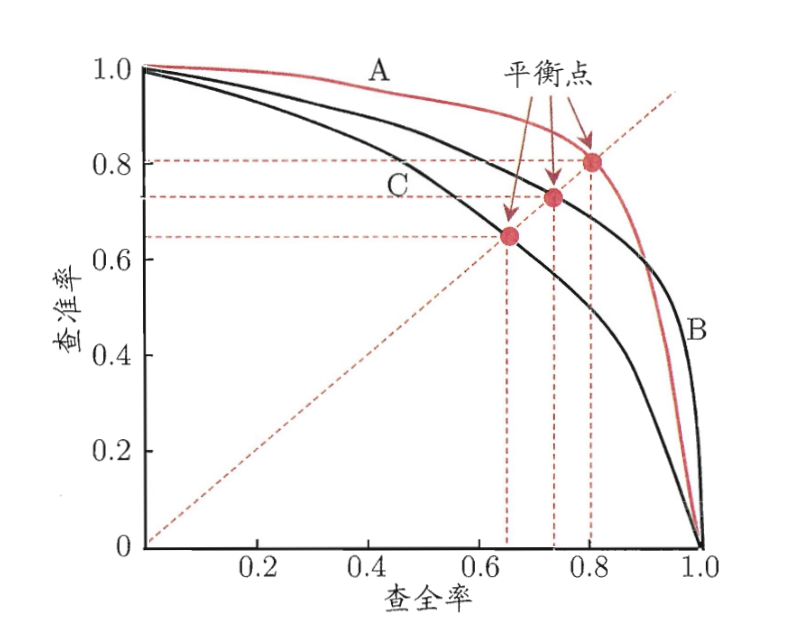

当查准率和查全率的值接近时，$F1$值最大，此时画连接$(0,0)$和$(1,1)$的直线，直线和PR曲线重合的地方的$F1$，是这条PR曲线最大的$F1$

**PR曲线的下面积**为平均精度(AP)，它是PR曲线的积分，用来评估目标检测模型的性能。一个越好的分类器，AP值越高。

#### 现在来看看改变阈值对查全率和查准率的影响

很多学习器对样本的预测是生成一个实值或概率值，并设定一个分类阈值，然后将预测值与该阈值进行比较，**大于阈值**的为**正类**，**小于阈值**为**负类**。

在不同的应用任务中，我们可根据任务需求采用不同的阈值。

如果我们**增大阈值**，大于阈值的正类样本和负类样本都会变少，小于阈值的正类样本和负类样本都会变多。

**大于阈值的正类样本** 对应 **正确预测的正类(TN)**，其变少，所以**查全率降低**

**大于阈值的负类样本** 对应 **被误判为正类的样本(FP)**，变少了，**大于阈值的样本** 对应 **所有预测为正类的样本(TN+FP)**，也变少了且下降的更快，所以**查准率提高**

类似的，如果我们**减小**这个**阀值**，**查全率提高**，**查准率降低**。

即真正例率和假正例率随阈值的改变趋势相反，所以PR曲线是向下的。

一般来说，查准率高时，查全率往往偏低；而查全率高时，查准率往往偏低。

PR曲线的意义在于，可以直观看出**查准率随着查全率增大的变化**。如果曲线越接近右上角，就说明随着Recall的增加，Precision往下掉的速度不明显。这说明如果需要的话，可以调整阈值以增加Recall，而不用担心Precision掉的太厉害。

### 5. ROC曲线
横坐标是“假正例率”（FPR），纵坐标是“真正例率”（TPR，即查全率）

FPR反映模型**把负例预测为正例**的能力

TPR反映模型**把正例预测为正例**的能力

ROC曲线越光滑越好，越靠近左上角越好

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412083646843.png)

![在这里插入图片描述](https://img-blog.csdnimg.cn/2021041211412057.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70)


阈值确定时，FP（大于阈值的负类样本）和TP（大于阈值的正类样本）也确定了。

所以对于每个分类器，一定的阈值对应一定的真正例率和假正例率，即ROC曲线上的一个点，将不断改变阈值得到的点链接起来，就得到ROC曲线。

#### 现在来看看改变阈值对真正例率和假正例率的影响

如果我们**增大阈值**，大于阈值的正类样本和负类样本都会变少

**大于阈值的正类样本** 对应 **预测正确的正类**，其变少，**真正例率下降**

**大于阈值的负类样本** 对应 **被误判为正类的样本**，其变少，**假正例率下降**

类似的，如果我们**减小阀值**，**真正例率和假正例率都提高**。

即真正例率和假正例率随阈值的改变趋势相同，所以ROC曲线是向上的。

阈值最大为1，所有样本被预测为负，对应ROC曲线的$(0,0)$
阈值最小为0，所有样本被预测为正，对应ROC曲线的$(1,1)$

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210411162406644.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70#pic_center)
一般情况下，ROC曲线都应该处于$(0,0)$和$(1,1)$连线的上方。

**ROC和PR：**

ROC曲线兼顾正例和负例的权衡。因为TPR聚焦于正例，FPR聚焦于负例。PR曲线的两个指标查准率和查全率都聚焦于正例。

在实际的数据集中经常会出现**类不平衡**现象，即负样本比正样本多很多（或者相反），而且测试数据中的正负样本的分布也可能随着时间变化，比如信用卡欺诈问题中每个月正例和负例的比例可能都不相同。当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变，而PR曲线会变化很大。

当正负样本数量差距不大的情况下，ROC和PR的趋势是差不多的，但是在正负样本分布极不均衡的情况下，PR比ROC更能真实的反映出实际情况，因为此时ROC曲线看起来似乎很好，但是在PR上却效果一般。

**PR曲线和ROC曲线应用场景：**
 - ROC曲线适用于评估分类器的**整体性能**，以及**需要剔除类别不平衡影响**的情况；而PR曲线适用于评估**更看重正例**的情况。
   
  -  如果有多份数据且存在不同的类别分布，比如信用卡欺诈问题中每个月正例和负例的比例可能都不相同，这时候如果**只想单纯地比较分类器的性能**且**剔除类别分布改变的影响**，则ROC曲线比较适合。
   
 -   在信息检索、推荐中，希望Precision较大，用户希望排名靠前的推荐是自己想要的结果，所以评估时PR曲线比较合适。

### 6. AUC值
AUC（Area Under Curve）被定义为ROC曲线下的面积(ROC的积分)，通常在**0.5 - 1**之间。

ROC曲线越靠近左上角，AUC值越大，分类器的性能越好。
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412114025551.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70)


**AUC评价：**

  AUC = 1，采用这个预测模型时，不管设定什么阈值都能完全准确预测。绝大多数预测的场合，不存在这种分类器。

  0.5 < AUC < 1，优于随机猜测。这个分类器设定合适的阈值，能有预测价值。

  AUC = 0.5，跟随机猜测一样（例：丢硬币），模型没有预测价值。

  AUC < 0.5，比随机猜测还差；但总是反预测，就优于随机猜测，因此不存在AUC < 0.5的情况。


## 二、回归模型的评估

回归算法的模型评估与分类算法的模型评估不同

在分类算法中，评判是否预测到了正确的分类；在回归算法中，评判是否预测到了正确的数值、以及是否拟合到了足够的信息。

### 1. 平均绝对误差MAE（Mean Absolute Error）
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412085356854.png)

   **缺点**：虽然MSE能获得一个评价值，但是你并不知道这个值代表模型拟合是优还是劣，只有通过对比才能达到效果。


### 2. 平均平方误差MSE（Mean Squared Error）
	
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412085418440.png)

   这也是线性回归中最常用的损失函数

 
### 3. 均方根误差（RMSE）
	
由于MSE与我们的目标变量的量纲不一致，为了保证量纲一致性，我们需要对MSE进行开方
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412091243890.png)
   **缺点**：平均误差对异常值比较敏感，异常值的出现会使RMSE的误差较大（如果有一个预测值与真实值相差很大，RMSE就会很大）。


### 4. $R^2$(决定系数)
	 
$R^2$判断的是预测模型和真实数据的拟合程度，最佳值为1，可为负值。
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412090033743.png)
    其中，$f(x_i)$为真实标签，$y_i$为预测结果，$\overline{y_i}$为样本均值。
- 分母为原始数据的离散程度，方差。
   
   
- 分子为预测数据和原始数据的误差，残差平方和，即模型没有拟合到的信息。
   
   
-  两者相除可以消除原始数据离散程度的影响。

如果$R^2$是0，说明模型没有拟合能力，预测值都是 $\overline{y_i}$

如果$R^2$是1，说明模型预测完全正确。

总之，$R^2$越接近1，表明这个模型对数据拟合的越好；$R^2$越接近0，表明模型拟合的越差

**缺点**：数据集的样本越大，R²越大，因此，不同数据集的模型结果比较会有一定的误差
	

### sklearn自带的回归模型评估指标
```python
mean_absolute_error(y_true, y_pred) #MAE

mean_squared_error(y_true, y_pred[, …]) #MSE

r2_score(y_true, y_pred[, …]) #R^2

explained_variance_score(y_true, y_pred) #可解释方差

mean_squared_log_error(y_true, y_pred) #均值平方对数误差

median_absolute_error(y_true, y_pred) #中位数绝对误差

```

### 下面是一些样本点

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412211659601.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70)

### 下面的三条线，分别对应三个回归模型的结果

**可以看出，红色的线拟合效果比较好，紫色的线没有拟合能力，绿色的线最差**

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210412221512427.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0OTU3Mzg4,size_16,color_FFFFFF,t_70#pic_center)

### 下面是红色的线对应模型的几种评估结果：

mean_absolute_error(y_true,y_ex)#平均绝对误差

**结果：0.24248035286300917**

mean_squared_error(y_true,y_ex)#均方误差

**结果：0.07919872929290986**

r2_score(y_true,y_ex)

**结果：0.9633942147205354**

### 下面是绿色的线对应模型的几种评估结果：

mean_absolute_error(y_true,y_pred2)#平均绝对误差

**结果：2.5184719922947116**

mean_squared_error(y_true,y_pred2)#均方误差

**结果：8.498868923661782**

r2_score(y_true,y_pred2)

**结果：-2.9281914459419114**